In [1]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

Importing plotly failed. Interactive plots will not work.


In [2]:
### Abrir o aquivo com a biblioteca pandas
df = pd.read_csv('./TFP.csv')

In [3]:
print(df.head)

<bound method NDFrame.head of     isocode  year    rtfpna
0       USA  1950  0.617148
1       USA  1951  0.629588
2       USA  1952  0.638451
3       USA  1953  0.651858
4       USA  1954  0.646179
..      ...   ...       ...
181     MEX  2007  1.013673
182     MEX  2008  0.991548
183     MEX  2009  0.915879
184     MEX  2010  0.941604
185     MEX  2011  0.955766

[186 rows x 3 columns]>


In [4]:
set(df.isocode)

{'CAN', 'MEX', 'USA'}

In [5]:
## Separar os paises em variaveis
df.index = df.year
year = df[df.isocode=='USA'].year
usa_rtfpna = df[df.isocode=='USA'].rtfpna
can_rtfpna = df[df.isocode=='CAN'].rtfpna
mex_rtfpna = df[df.isocode=='MEX'].rtfpna

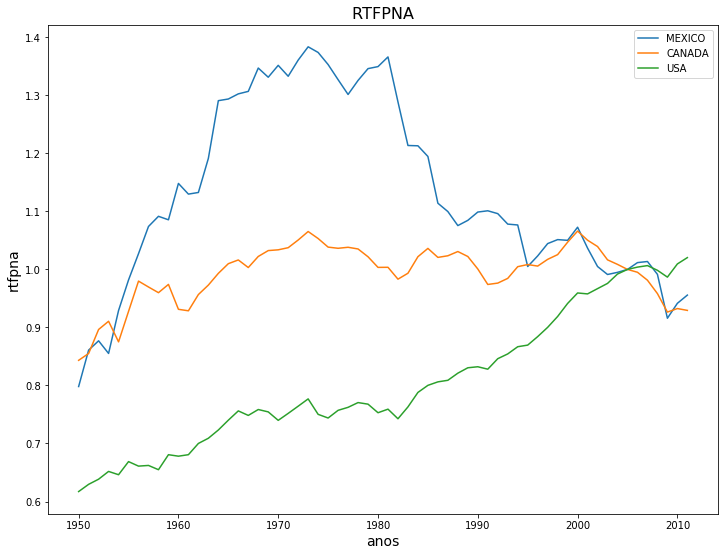

In [6]:
fig=plt.figure(figsize=(12,9))
plt.title('RTFPNA',fontsize=16)
plt.plot(mex_rtfpna,label='MEXICO')
plt.plot(can_rtfpna,label='CANADA')
plt.plot(usa_rtfpna,label='USA')
plt.ylabel('rtfpna',fontsize=14)
plt.xlabel('anos',fontsize=14)
plt.legend()
plt.show()

In [7]:
######## Tranformar as datas para detetime do pyhton para usar o prophet
######## Deixar os ultimos 10 anos para testar o modelo.
anos=usa_rtfpna.index
ds=[]
for i in range(anos[0],anos[-1]+10):
    ds.append(dt.datetime(i,1,1))
#### Separar o conjunto de teste e treinamento
USA=pd.DataFrame({'ds':ds[:-19],'y':usa_rtfpna.values[:-10]})
USA_test=pd.DataFrame({'ds':ds[:-9],'y':usa_rtfpna.values})
USA_test.index=USA_test.ds

In [8]:
m = Prophet()
m.fit(USA)
future_usa=pd.DataFrame({'ds':ds[-19:]})
future_usa = m.predict(future_usa)
future_usa[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_usa.index=future_usa.ds

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


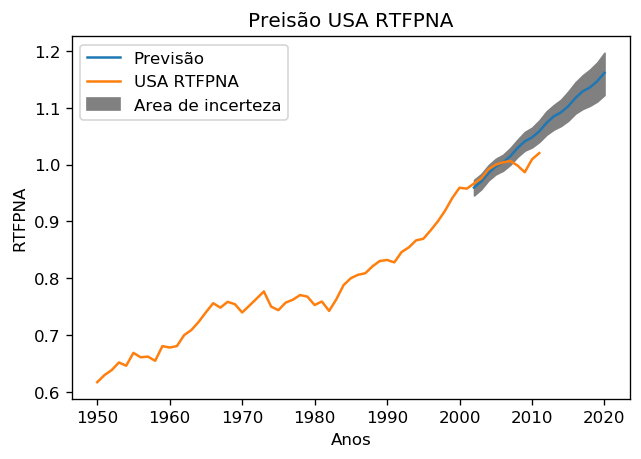

In [9]:
simple_bias=USA_test.y[-12]-future_usa.yhat[0]

fig=plt.figure(dpi=120)
plt.plot(future_usa.yhat,label='Previsão')
plt.plot(USA_test.y,label='USA RTFPNA')
plt.fill_between(future_usa.index,future_usa.yhat_lower+simple_bias, future_usa.yhat_upper+simple_bias,
                 color='gray',label='Area de incerteza')
plt.title('Preisão USA RTFPNA')
plt.ylabel('RTFPNA')
plt.xlabel('Anos')

plt.legend()
plt.show()

In [10]:
######## Tranformar as datas para detetime do pyhton para usar o prophet
######## Deixar os ultimos 10 anos para testar o modelo.
MEX=pd.DataFrame({'ds':ds[:-18],'y':mex_rtfpna.values[:-9]})
MEX_test=pd.DataFrame({'ds':ds[:-9],'y':mex_rtfpna.values})
MEX_test.index=MEX_test.ds
m = Prophet()
m.fit(MEX)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
future_mex=pd.DataFrame({'ds':ds[-20:]})
future_mex = m.predict(future_mex)
future_mex[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_mex.index=future_mex.ds

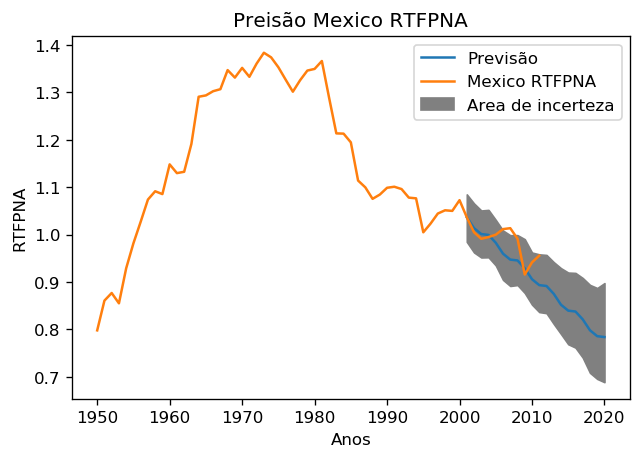

In [12]:
simple_bias=MEX_test.y[-11]-future_mex.yhat[0]
fig=plt.figure(dpi=120)
plt.plot(future_mex.yhat+simple_bias,label='Previsão')
plt.plot(MEX_test.y,label='Mexico RTFPNA')
plt.fill_between(future_mex.index,
                  future_mex.yhat_lower+simple_bias, 
                  future_mex.yhat_upper+simple_bias,
                  color='gray',label='Area de incerteza')
plt.title('Preisão Mexico RTFPNA')
plt.ylabel('RTFPNA')
plt.xlabel('Anos')
plt.legend()
plt.show()

In [13]:
######## Tranformar as datas para detetime do pyhton para usar o prophet
######## Deixar os ultimos 5 anos para testar o modelo.
CAN=pd.DataFrame({'ds':ds[:-14],'y':can_rtfpna.values[:-5]})
CAN_test=pd.DataFrame({'ds':ds[:-9],'y':can_rtfpna.values})
CAN_test.index=CAN_test.ds
m = Prophet()
m.fit(CAN)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future_can=pd.DataFrame({'ds':ds[-14:]})
future_can = m.predict(future_can)
future_can[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_can.index=future_can.ds

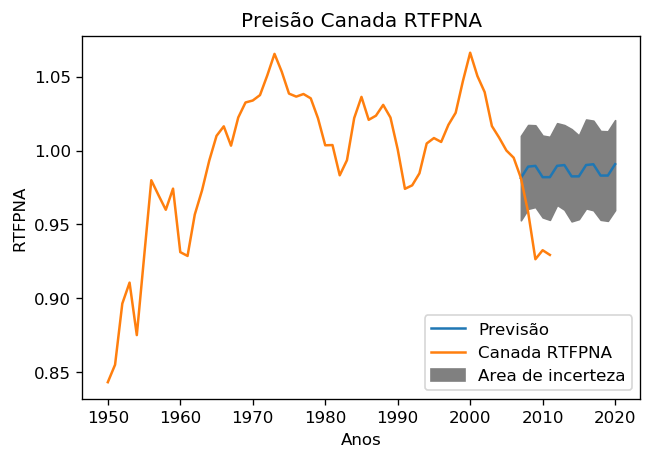

In [15]:
simple_bias=CAN_test.y[-5]-future_can.yhat[0]

fig=plt.figure(dpi=120)
plt.plot(future_can.yhat+simple_bias,label='Previsão')
plt.plot(CAN_test.y,label='Canada RTFPNA')
plt.fill_between(future_can.index,
                  future_can.yhat_lower+simple_bias, 
                  future_can.yhat_upper+simple_bias,
                  color='gray',label='Area de incerteza')
plt.title('Preisão Canada RTFPNA')
plt.ylabel('RTFPNA')
plt.xlabel('Anos')
plt.legend()
plt.show()